# PROJECT BY : SYEDA UMAIMA TAMKEEN 
__________________________________________________________________________________________________________________________________________________________________________________                                                   

# Project Title: Predicting House Prices Using Linear Regression

# Summary:

In this project, I developed a predictive model to estimate house prices based on various features such as size, number of bedrooms, bathrooms, and location. Using a dataset containing detailed information on houses, including categorical variables like city and property type, I trained and evaluated a Linear Regression model to predict house prices.

# Key Steps:

> **Data Exploration:**

- Loaded and explored the dataset to understand its structure, including the number of features, data types, and missing values.
- Visualized key relationships between features, such as the correlation between bedrooms, bathrooms, and house prices, and analyzed the distribution of house prices across different cities and property types.

> **Data Preprocessing:**

- Addressed missing values and removed duplicates to clean the data.
- Encoded categorical variables (e.g., city, property type, purpose) using one-hot encoding and created additional features like Area_in_Squareft and bed_bath_interaction to capture potential interactions.
- Scaled the numerical features to ensure consistent input ranges for the model.
  
> **Feature Engineering:**

- Created interaction terms and log-transformed the price variable to reduce skewness and improve model performance.
  
> **Model Training:**

- Trained a Linear Regression model using the transformed training data to capture the linear relationships between features and the target variable (log of price).
  
> **Model Evaluation:**

- Assessed the model’s performance on the test set using evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R2 Score.
- Visualized residuals and analyzed errors to identify areas where the model could be improved.
  
> **Model Fine-tuning:**

- Made minor adjustments, including feature selection and scaling strategies, to optimize model performance without overfitting.
  
# Results:

> **Model Evaluation Metrics:**

Mean Absolute Error (MAE): **0.2674812463263581**

Mean Squared Error (MSE): **0.14822224701991504**

Root Mean Squared Error (RMSE): **0.3849964246845872**

R2 Score: **0.9763351473457418**

# Conclusion:

The Linear Regression model demonstrated a high level of accuracy in predicting house prices, as indicated by an R2 Score of 0.976. While the model captures the linear relationships effectively, there is room for further improvements. Future work could involve exploring advanced regression techniques like Lasso or Ridge Regression to handle multicollinearity, or implementing more sophisticated models such as Random Forests or Gradient Boosting Machines to capture non-linear patterns. Additionally, incorporating more granular location data or domain-specific features could further enhance the model’s predictive power in real-world applications.



# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Load the dataset

In [2]:
df= pd.read_csv("house_prices.csv")

In [3]:
df.head()

,s.no,property_type,price,location,city,bathrooms,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


In [4]:
df.shape

(99499, 9)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   s.no           99499 non-null  int64  
 1   property_type  99499 non-null  object 
 2   price          99499 non-null  int64  
 3   location       99499 non-null  object 
 4   city           99499 non-null  object 
 5   bathrooms      99499 non-null  int64  
 6   purpose        99499 non-null  object 
 7   bedrooms       99499 non-null  int64  
 8   Area_in_Marla  99499 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 6.8+ MB


In [7]:
df.dtypes


s.no               int64
property_type     object
price              int64
location          object
city              object
bathrooms          int64
purpose           object
bedrooms           int64
Area_in_Marla    float64
dtype: object

In [9]:
df.isnull().sum()

s.no             0
property_type    0
price            0
location         0
city             0
bathrooms        0
purpose          0
bedrooms         0
Area_in_Marla    0
dtype: int64

In [10]:
df['Area_in_Squareft'] = df['Area_in_Marla'] * 272.25
df.drop('Area_in_Marla',axis=1, inplace = True)

df.head()

,s.no,property_type,price,location,city,bathrooms,purpose,bedrooms,Area_in_Squareft
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,1089.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,1524.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,2178.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,10890.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,2178.0


In [11]:
df.describe()

,s.no,price,bathrooms,bedrooms,Area_in_Squareft
count,99499.000000,9.949900e+04,99499.000000,99499.000000,99499.000000
mean,78883.893064,1.037592e+07,3.530106,3.350737,2384.223649
std,48239.423663,1.066000e+07,1.474217,1.255913,2032.746725
min,0.000000,1.550000e+04,1.000000,0.000000,0.000000
25%,37236.500000,1.500000e+05,2.000000,2.000000,1306.800000
50%,76065.000000,7.500000e+06,3.000000,3.000000,1824.075000
75%,119401.500000,1.550000e+07,5.000000,4.000000,2722.500000
max,168445.000000,4.490000e+07,7.000000,6.000000,52816.500000


# Data Visualization

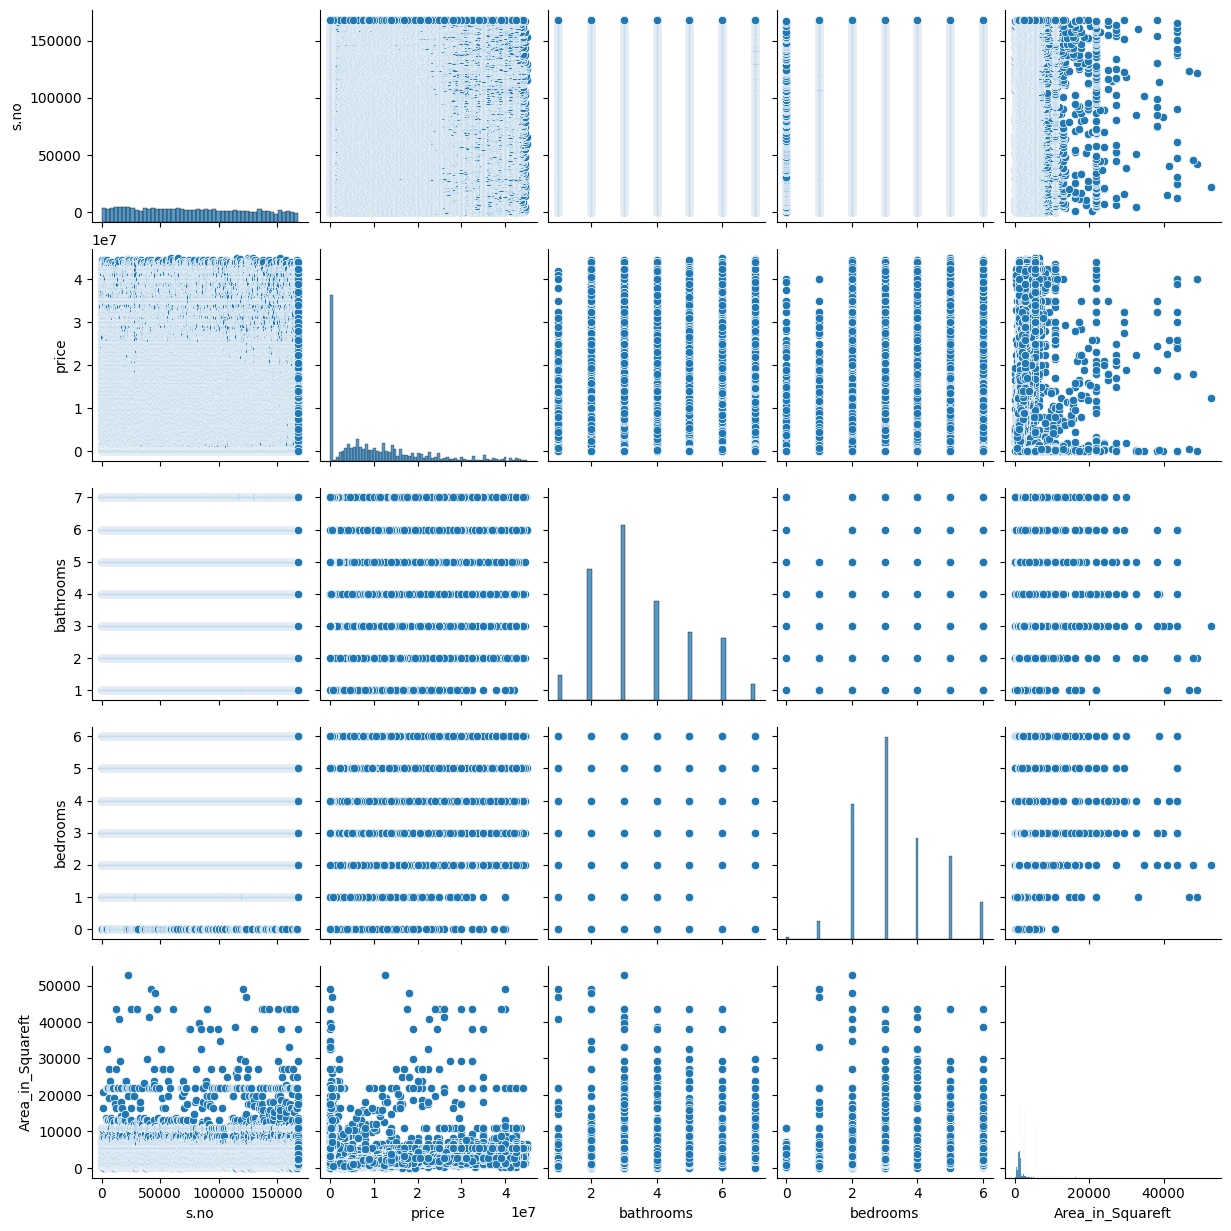

In [12]:
sns.pairplot(df)

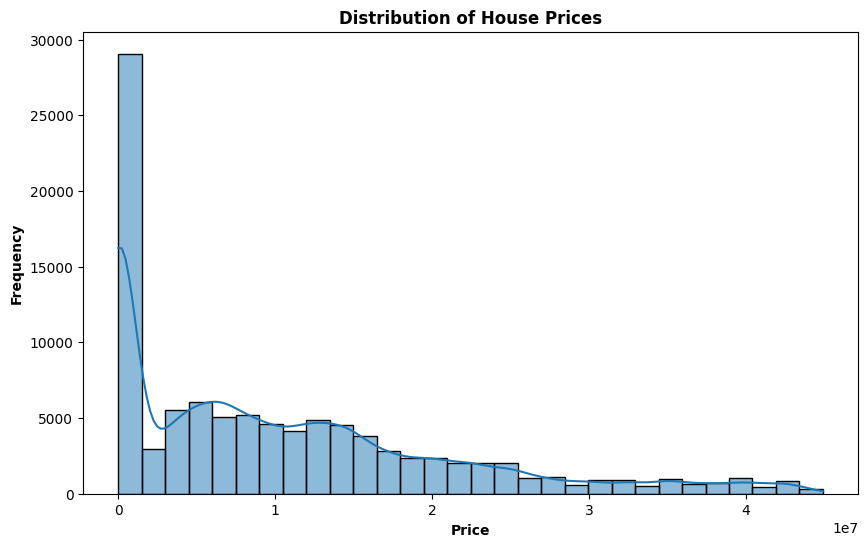

In [63]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of House Prices',  fontweight = 'bold')
plt.xlabel('Price', fontweight = 'bold')
plt.ylabel('Frequency',  fontweight = 'bold')
plt.show()


C:\Users\SYED HASEEB ALI\AppData\Local\Temp\ipykernel_7916\2288602429.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='city', palette=custom_colors)


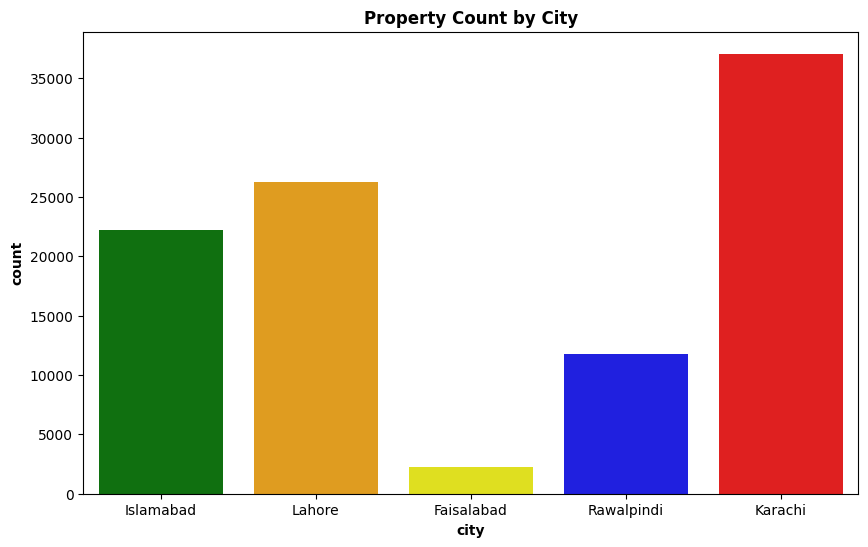

In [100]:
plt.figure(figsize=(10,6))
custom_colors = ['Green', 'Orange', 'Yellow', 'Blue', 'Red']
sns.countplot(data=df, x='city', palette=custom_colors)
plt.title('Property Count by City', fontweight='bold')
plt.xlabel('city', fontweight='bold') 
plt.ylabel('count', fontweight='bold') 
plt.xticks(rotation=0)
plt.show()


C:\Users\SYED HASEEB ALI\AppData\Local\Temp\ipykernel_7916\2370708307.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='city', y='price', palette=palette)


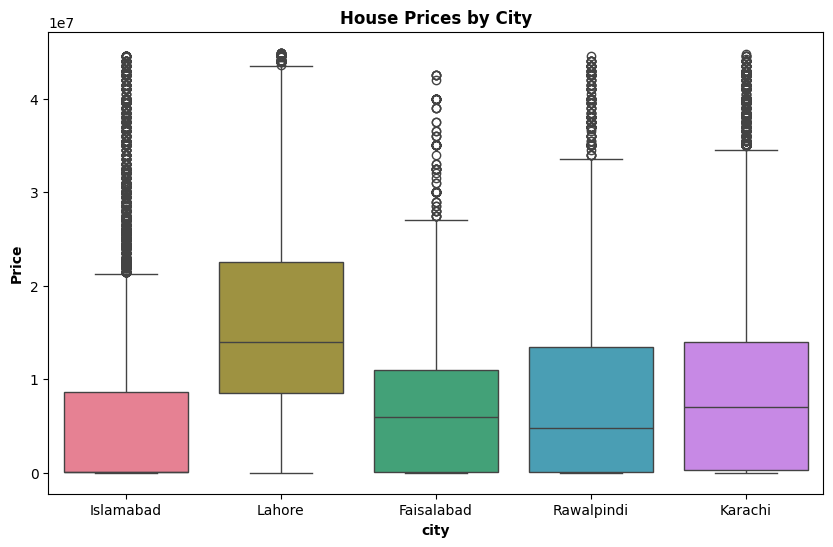

In [99]:
plt.figure(figsize=(10,6))
palette = sns.color_palette("husl", n_colors=len(df['city'].unique()))
sns.boxplot(data=df, x='city', y='price', palette=palette)
plt.title('House Prices by City', fontweight='bold')
plt.xlabel('city', fontweight='bold') 
plt.ylabel('Price', fontweight='bold') 
plt.xticks(rotation=0)
plt.show()


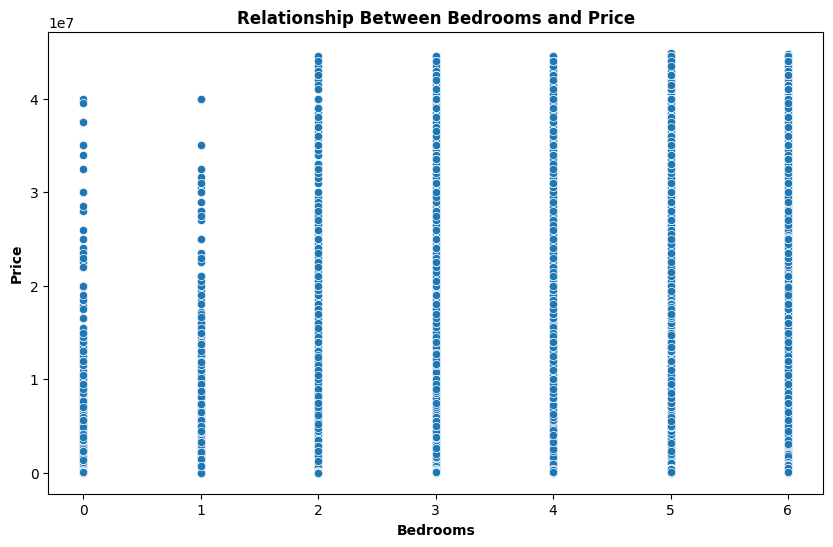

In [113]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='bedrooms', y='price')
plt.title('Relationship Between Bedrooms and Price', fontweight='bold')
plt.xlabel('Bedrooms', fontweight='bold') 
plt.ylabel('Price', fontweight='bold')     
plt.show()


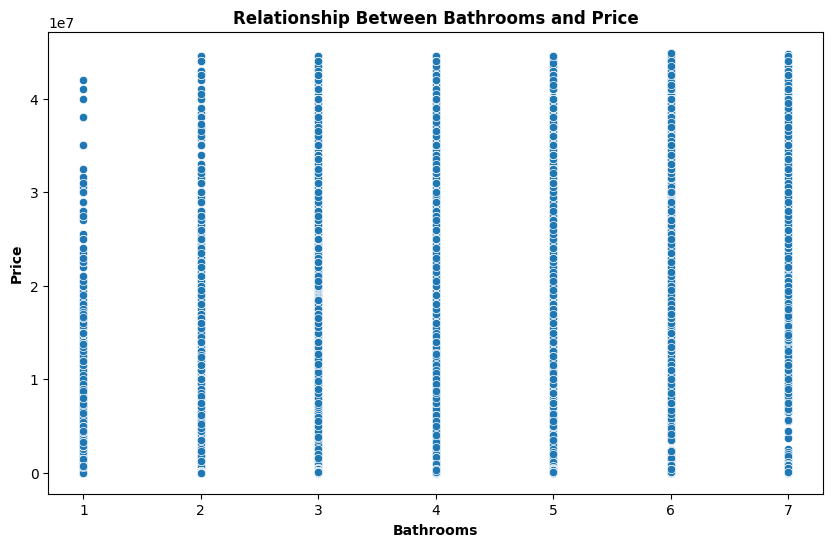

In [114]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='bathrooms', y='price')
plt.title('Relationship Between Bathrooms and Price', fontweight='bold')
plt.xlabel('Bathrooms', fontweight='bold') 
plt.ylabel('Price', fontweight='bold')
plt.show()


C:\Users\SYED HASEEB ALI\AppData\Local\Temp\ipykernel_2604\1337681644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=property_type_counts.index, y=property_type_counts.values, palette=palette)


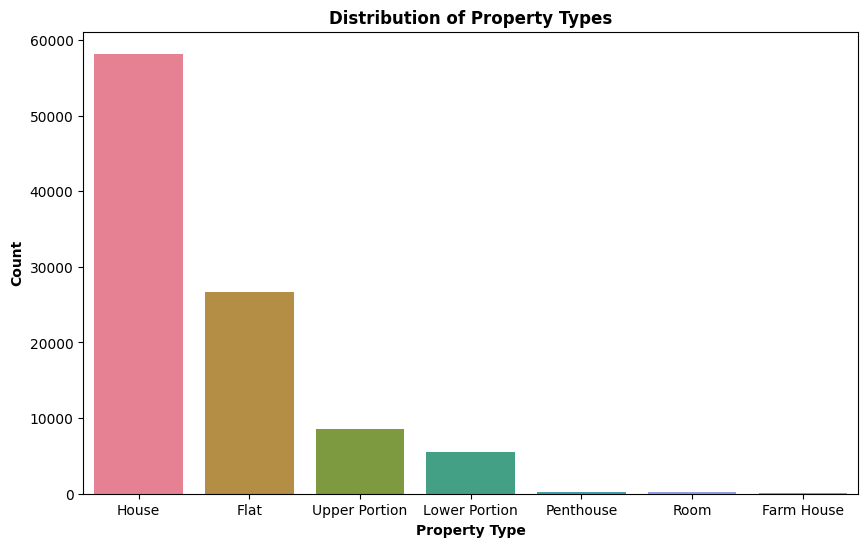

In [5]:
property_type_counts = df['property_type'].value_counts()  # Make sure 'property_type' exists in your dataset
plt.figure(figsize=(10, 6))
palette = sns.color_palette("husl", n_colors=len(property_type_counts))
sns.barplot(x=property_type_counts.index, y=property_type_counts.values, palette=palette)
plt.title('Distribution of Property Types', fontweight='bold')
plt.xlabel('Property Type', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(rotation=0)
plt.show()


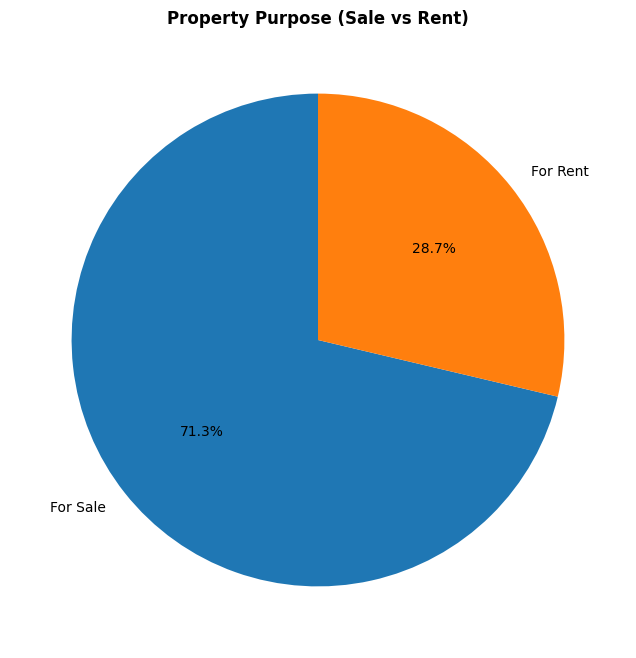

In [144]:
plt.figure(figsize=(8,8))
purpose_counts = df['purpose'].value_counts()
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Property Purpose (Sale vs Rent)', fontweight='bold')
plt.show()


C:\Users\SYED HASEEB ALI\AppData\Local\Temp\ipykernel_7916\446813566.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='location', data=df_top_localities, order=top_localities , palette=custom_colors)


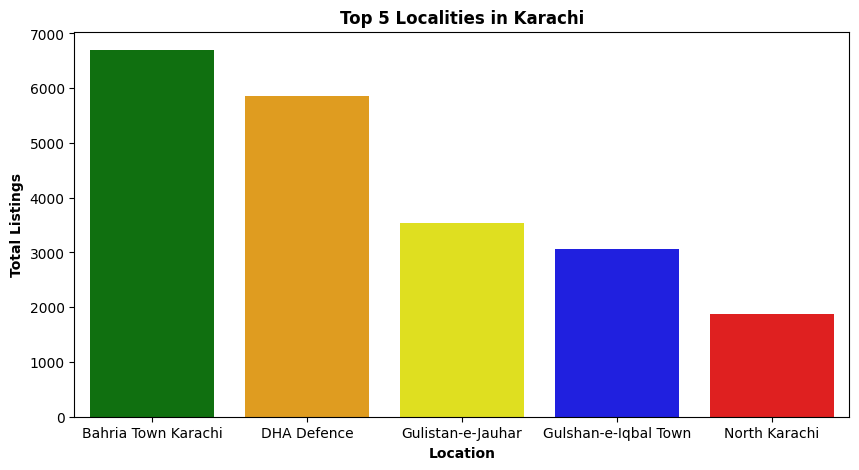

In [147]:
df_karachi = df[df['city'] == 'Karachi']
custom_colors = ['Green', 'Orange', 'Yellow', 'Blue', 'Red']
top_localities = df_karachi['location'].value_counts().nlargest(5).index
df_top_localities = df_karachi[df_karachi['location'].isin(top_localities)]
plt.figure(figsize=(10, 5))
sns.countplot(x='location', data=df_top_localities, order=top_localities , palette=custom_colors)
plt.title('Top 5 Localities in Karachi', fontweight = 'bold')
plt.xlabel('Location', fontweight = 'bold')
plt.ylabel('Total Listings', fontweight = 'bold')
plt.show()

# Data cleaning and preprocessing

In [17]:
encoder = LabelEncoder()

In [18]:
df_encoded = pd.get_dummies(df, columns=['property_type', 'city', 'purpose'], drop_first=True)


In [19]:
df.dtypes

s.no               int64
property_type     object
price              int64
location          object
city              object
bathrooms          int64
purpose           object
bedrooms           int64
Area_in_Marla    float64
dtype: object

# Feature Engineering

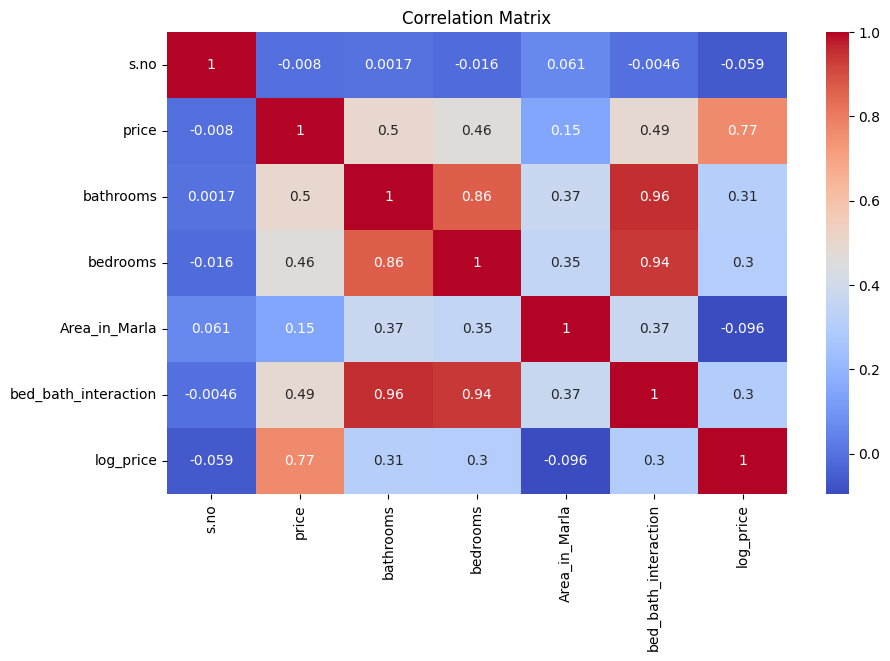

In [20]:
df_encoded['bed_bath_interaction'] = df_encoded['bedrooms'] * df_encoded['bathrooms']

df_encoded['log_price'] = np.log(df_encoded['price'])

numeric_columns = df_encoded.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

# Split the data into training and testing sets

In [22]:
X= df_encoded.drop(columns=['price', 'log_price'])  # Use log_price if you've transformed it
y = df_encoded['log_price']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model selection and training
> **Use linear regression as the predictive model**

In [25]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Model evaluation and fine-tuning


In [28]:
y_pred = model.predict(X_test)

>  Evaluate the model using MAE, MSE, RMSE, and R2 Score

In [29]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 0.2674812463263581
Mean Squared Error: 0.14822224701991504
Root Mean Squared Error: 0.3849964246845872
R2 Score: 0.9763351473457418
